# The phase-field crystal: Basic framework

In this tutorial, we will look at the basic framework of the phase-field crystal.

The phase-field crystal is a modelling approach where the primary variable of interest is a scalar field $\psi$ which has peaks in the positions of a crystalline lattice. 
For more details on the theoretical framework, see the [phase-field crystal documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/). 


First, install ComFiT if not already installed. 

In [ ]:
!pip install comfit -q

Now, we import comfit.

In [1]:
import comfit as cf

The triangular PFC is the simplest PFC model.
In order to create it, we must specify the number of unit cell repetitions in the x- and y-direction respectively, by giving `nx` and `ny` as arguments to the class `PhaseFieldCrystal2DTriangular`. 
Because of the lattice symmetry, it is useful to have approximately $\sqrt 3$ more repetitions in the x-direction than the $y$-direction.

Create an instance of this system with `nx=34` and `ny=20`.

In [3]:
pfc = cf.PhaseFieldCrystal2DTriangular(34,20)

<details>
<summary>Solution</summary>
<p>
<pre><code>
pfc = cf.PhaseFieldCrystal2DTriangular(34,20)
</code></pre>
</p>
</details>

When initializing a PFC, the field itself is not yet created, because we might want to add dislocations (more on that later).
But if you would only like to see the PFC, it can be produced by the follwing piece of code.

In [4]:
pfc.conf_PFC_from_amplitudes()

Now. Plot the phase-field $\psi$!

<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

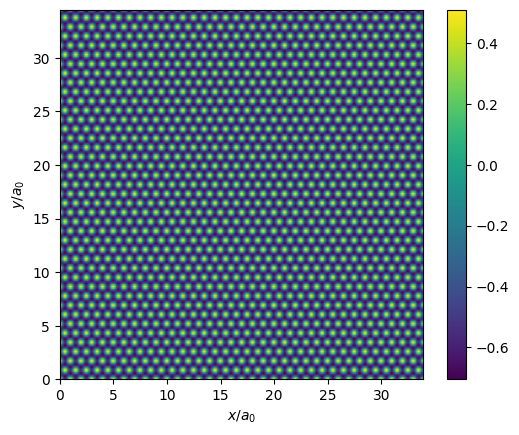

In [6]:
pfc.plot_field(pfc.psi,grid=False)

<details>
<summary>Solution</summary>
<p>
<pre><code>
pfc.plot_field(pfc, grid=False)
</code></pre>
</p>
</details>

The way to insert dislocations into the PFC is by manipulating the so-called amplitude fields.
These are stored in a numpy object typically named `eta` and consists of three _complex_ fields. 
In order to create complex fields corresponding to a dislocation dipole, you must call the `calc_amplitudes_with_dislocation_dipole` function, which will return the eta object. 
This function takes an keyword argument `dislocation_type`, which is specifies the type of the dislocation to be inserted. 
For more information of these complex fields, see the [phase-field crystal documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/).

Now, create the `eta` fields associated with a dislocation dipole with `dislocation_type=1` and plot the `eta[0]`, the complex field associated with the first Fourier mode.

dipole position [123.3383567679268, 125.66370614359171]
dipole vector [82.22557117861787, 0.0]


<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

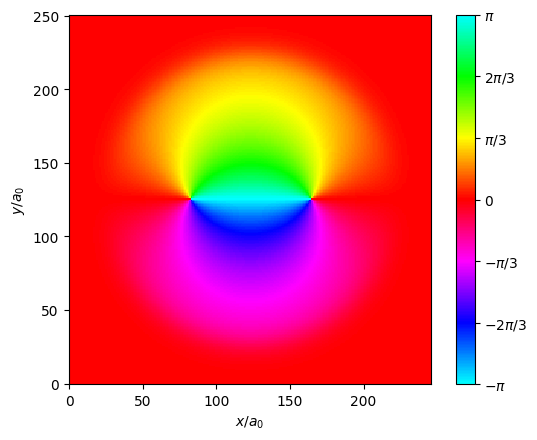

In [8]:
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.plot_complex_field(eta[0])

<details>
<summary>Solution</summary>
<p>
<pre><code>
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.plot_complex_field(eta[0])
</code></pre>
</p>
</details>

Now, calculate the PFC corresponding to this dislocation dipole by passing `eta` as an arugment to `conf_PFC_from_amplitudes`, and plot the PFC.

<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

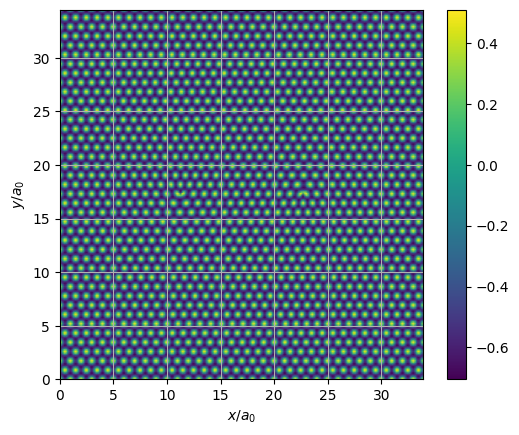

In [10]:
pfc.conf_PFC_from_amplitudes(eta)
pfc.plot_field(pfc.psi)

Now, using the class `PhaseFieldCrystal2DSquare`, create a square PFC with a dislocation dipole.

dipole position [62.83185307179586, 62.83185307179586]
dipole vector [41.88790204786391, 0.0]


<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

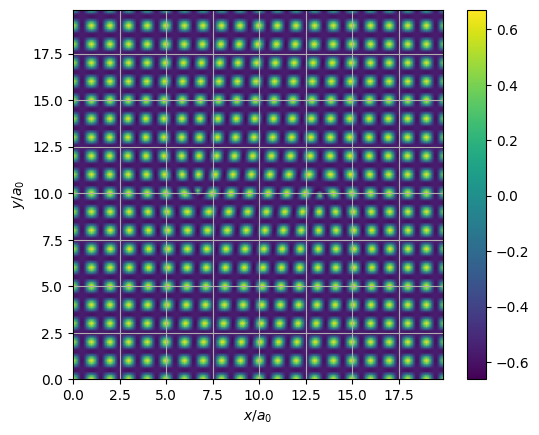

In [13]:
pfc = cf.PhaseFieldCrystal2DSquare(20,20)
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.conf_PFC_from_amplitudes(eta)
pfc.plot_field(pfc.psi)

The dislocations can be identified using the code `calc_dislocation_nodes`, which returns a dictionary typically called `Dnodes`. 
In order to print the values, it is recommended to import `pprint` (pretty print) from `pprint`.

These `Dnodes` may be plotted by the function `plot_dislocation_nodes`. 

[{'Burgers_vector': array([6.28318531, 0.        ]),
  'position': [82.50183170527784, 62.00269526786096],
  'position_index': (92, 69)},
 {'Burgers_vector': array([-6.28318531, -0.        ]),
  'position': [43.16533785497868, 63.66179937047429],
  'position_index': (48, 71)}]


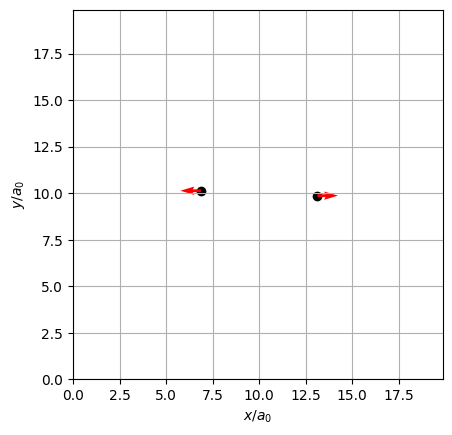

In [18]:
from pprint import pprint
Dnodes = pfc.calc_dislocation_nodes()
pprint(Dnodes)
pfc.plot_dislocation_nodes(Dnodes)

The PFC classes come with different ways of evolving the PFC ([phase-field crystal documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/)).
The classic PFC evolution is given by calling `evolve_PFC`. 

Evolve the PFC for 10 time steps and plot the result!

Evolving the PFC: 100%|██████████| 100/100 [00:00<00:00, 354.97it/s]


<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

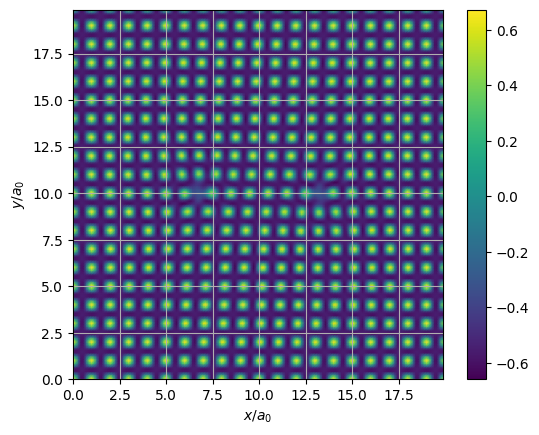

In [14]:
pfc.evolve_PFC(100)
pfc.plot_field(pfc.psi)